# SML Lab 4

In [1]:
# Imports:
import turicreate as tc
import re
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1) Imagine that a movie production company wants to use a sentiment analysis model to identify positive/negative reviews of their movies. 
# Which is worse for this use case, a false positive or a false negative, or are they equally bad? What value of β would be suitable for an Fβ score? 
# Explain your reasoning in markdown, and state a value of β.

**Explanation:**

1. I believe that both are equally bad. With a false negative (FN), the model would wrongly predict a review to be negative (with a positive label), which would wrongly balance the overall rating.
With a false positive (FP), the model would wrongly predict a positive review (with a negative label), which would also wrongly balance the overall movie's rating.

3. A suitable value for β in the Fβ score is 1. This value addresses the balance between precision and recall for this use case. This is because FN and FP are both equally important.

In [3]:
# Here is the explanation again if the markdown isn't visible:

# Explanation:
# 1. I believe that both are equally bad. With a false negative (FN), the model would wrongly predict a review to be negative (with a positive label), which would wrongly balance the overall rating. 
# With a false positive (FP), the model would wrongly predict a positive review (with a negative label), which would also wrongly balance the overall movie's rating.

# 2. A suitable value for β in the Fβ score is 1. This value addresses the balance between precision and recall for this use case. This is because FN and FP are both equally important.

In [4]:
# 2) Load the original dataset into an SFrame. Write a function to clean the data using the ‘re’ library, so that it is better suited for sentiment analysis. 
# Use the function to clean the data and store it in a new column of the SFrame.

movies = tc.SFrame('IMDB_Dataset.csv')

def clean(sample):
    sample = re.sub('\d', '', sample)
    sample = re.sub('<.{1,4}>', ' ', sample)
    sample = re.sub('[^\w\s]', ' ', sample)
    sample = sample.lower()
    return sample

#clean = np.array(clean(review))
movies['clean'] = movies['review'].apply(clean)

Finished parsing file /home/mgalinsky/SML/Lab4/IMDB_Dataset.csv

Parsing completed. Parsed 100 lines in 3.65456 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 39624 lines. Lines per second: 49460.1

Finished parsing file /home/mgalinsky/SML/Lab4/IMDB_Dataset.csv

Parsing completed. Parsed 50000 lines in 0.919751 secs.

In [5]:
# 3) Use Turi Create text_analytics.count_words() to count the occurrences of each word in each review; store this data in a new column of the SFrame.

movies['words'] = tc.text_analytics.count_words(movies['review'])

In [6]:
# 4) Split the data into training/validation/testing sets using 80%/10%/10% respectively.

train_data, remaining_data = movies.random_split(0.8)
val_data, test_data = remaining_data.random_split(0.5)

In [7]:
# 5) Use Turi Create to create a logistic classifier for sentiment analysis called model1. Find predictions using model.predict() with output_type='probability'; 
# do this for the training and validation sets and store them SArrays called train_pred_1 and val_pred_1.
# Use functions within turicreate.evaluation to calculate and display, for the training and validation sets:
#  · accuracies
#  · confusion matrices
#  · Fβ scores (using the value of β you chose above)
#  · AUC

model1 = tc.logistic_classifier.create(train_data, features=['words'], target='sentiment')

train_pred_1 = model1.predict(train_data, output_type='probability')
train_class_1 = model1.predict(train_data, output_type='class')

# Training Dataset
print('Training Dataset: \n')
print('Confusion Matrix: \n', tc.evaluation.confusion_matrix(train_data['sentiment'], train_class_1))
print('Accuracy:', tc.evaluation.accuracy(train_data['sentiment'], train_class_1))
print('Precision:', tc.evaluation.precision(train_data['sentiment'], train_class_1))
print('Recall:', tc.evaluation.recall(train_data['sentiment'], train_class_1))
print('F[1] Score:', tc.evaluation.fbeta_score(train_data['sentiment'], train_class_1, beta=1))
print('AUC:', tc.evaluation.auc(train_data['sentiment'], train_pred_1))

val_pred_1 = model1.predict(val_data, output_type='probability')
val_class_1 = model1.predict(val_data, output_type='class')

# Validation Dataset
print('\n \nValidation Dataset: \n')
print('Confusion Matrix:\n', tc.evaluation.confusion_matrix(val_data['sentiment'], val_class_1))
print('Accuracy:', tc.evaluation.accuracy(val_data['sentiment'], val_class_1))
print('Precision:', tc.evaluation.precision(val_data['sentiment'], val_class_1))
print('Recall:', tc.evaluation.recall(val_data['sentiment'], val_class_1))
print('F[1] Score:', tc.evaluation.fbeta_score(val_data['sentiment'], val_class_1, beta=1))
print('AUC:', tc.evaluation.auc(val_data['sentiment'], val_pred_1))

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 38045

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 92683

Number of coefficients      : 92684

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.262193     | 0.923722          | 0.849725            |

| 1         | 4        | 1.000000  | 1.564133     | 0.954396          | 0.849725            |

| 2         | 6        | 0.972300  | 1.843425     | 0.980024          | 0.886670            |

| 3         | 7        | 1.000000  | 2.034676     | 0.984439          | 0.888168            |

| 4         | 8        | 1.000000  | 2.217235     | 0.992824          | 0.895157            |

| 9         | 13       | 1.000000  | 3.190709     | 0.999842          | 0.870694            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Training Dataset: 

Confusion Matrix: 
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   positive   |     positive    | 19923 |
|   positive   |     negative    |  144  |
|   negative   |     negative    | 19860 |
|   negative   |     positive    |  121  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Accuracy: 0.9933829404714343
Precision: 0.993963280782279
Recall: 0.992824039467783
F[1] Score: 0.9933933334995388
AUC: 0.9983261194861089

 
Validation Dataset: 

Confusion Matrix:
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   positive   |     positive    |  2148 |
|   positive   |     negative    |  327  |
|   negative   |     negative    |  2195 |
|   negative   |     positive    |  326  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Accuracy: 0.8692954363490792
Precision: 0.868

In [8]:
# 6) Repeat step 5 to create model2, but this time experiment with l1_penalty and l2_penalty hyperparameters to get a better model. (You can try other 
# hyperparameters too if you wish. See the documentation.) Keep printing out the metrics each time you try a new model, so that you can compare its performance to model1.

model2 = tc.logistic_classifier.create(train_data, features=['words'], target='sentiment', l1_penalty=0.01, l2_penalty=0.5)

train_pred_2 = model2.predict(train_data, output_type='probability')
train_class_2 = model2.predict(train_data, output_type='class')

# Training Dataset
print('Training Dataset: \n')
print('Confusion Matrix: \n', tc.evaluation.confusion_matrix(train_data['sentiment'], train_class_2))
print('Accuracy:', tc.evaluation.accuracy(train_data['sentiment'], train_class_2))
print('Precision:', tc.evaluation.precision(train_data['sentiment'], train_class_2))
print('Recall:', tc.evaluation.recall(train_data['sentiment'], train_class_2))
print('F[1] Score:', tc.evaluation.fbeta_score(train_data['sentiment'], train_class_2, beta=1))
print('AUC:', tc.evaluation.auc(train_data['sentiment'], train_pred_2))

val_pred_2 = model2.predict(val_data, output_type='probability')
val_class_2 = model2.predict(val_data, output_type='class')

# Validation Dataset
print('\n \nValidation Dataset: \n')
print('Confusion Matrix:\n', tc.evaluation.confusion_matrix(val_data['sentiment'], val_class_2))
print('Accuracy:', tc.evaluation.accuracy(val_data['sentiment'], val_class_2))
print('Precision:', tc.evaluation.precision(val_data['sentiment'], val_class_2))
print('Recall:', tc.evaluation.recall(val_data['sentiment'], val_class_2))
print('F[1] Score:', tc.evaluation.fbeta_score(val_data['sentiment'], val_class_2, beta=1))
print('AUC:', tc.evaluation.auc(val_data['sentiment'], val_pred_2))

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 38045

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 92650

Number of coefficients      : 92651

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 1.000000  | 0.127898     | 0.499829          | 0.524713            |

| 1         | 2        | 0.000008  | 3.504083     | 0.922250          | 0.862706            |

| 2         | 3        | 0.000008  | 3.806792     | 0.964174          | 0.890664            |

| 3         | 4        | 0.000005  | 4.233318     | 0.961808          | 0.883674            |

| 4         | 5        | 0.000002  | 4.746242     | 0.976607          | 0.901648            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Training Dataset: 

Confusion Matrix: 
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   positive   |     positive    | 19526 |
|   positive   |     negative    |  541  |
|   negative   |     negative    | 19435 |
|   negative   |     positive    |  546  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Accuracy: 0.9728575709149021
Precision: 0.9727979274611399
Recall: 0.9730403149449345
F[1] Score: 0.9729191061062806
AUC: 0.9957801803874944

 
Validation Dataset: 

Confusion Matrix:
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   positive   |     positive    |  2274 |
|   positive   |     negative    |  201  |
|   negative   |     negative    |  2206 |
|   negative   |     positive    |  315  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Accuracy: 0.8967173738991193
Precision: 0.8

In [9]:
# 7) Use markdown to select which of your two models is the best (or declare a tie); justify your choice by commenting on the metrics.

**Explanation:**
<pre>
The model I chose is model2 with penalties of l1=0.01, and l2=0.5. Here is why I chose it:
1. Evaluation metrics: Model2 maintains the highest turicreate evaluation metrics (accuracy, AUC, and F1 score) when compared to model2.
   Percision and recall are also well-balanced, which, for this particular use case, makes it suitable since both FP and FN are equally important.
2. Confusion matrix: The confusion matrix for model2 with l1=0.01 and l2=0.5 demonstrates fewer FN and FP compared to other configurations, and model1.

To summarize, model2 with penalties of l1=0.01 and l2=0.5 achieves the best metrics and confusion matrix results, making it the best model for this use case.
</pre>

**Metrics for model1:**
<pre>
Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19851 |           |   positive   |     positive    |  2186 |
|   positive   |     negative    |  123  |           |   positive   |     negative    |  325  |
|   negative   |     negative    | 19845 |           |   negative   |     negative    |  2240 |
|   negative   |     positive    |  129  |           |   negative   |     positive    |  279  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9936917993391409                       - Accuracy: 0.8799204771371769
- Precision: 0.9935435435435436                      - Precision: 0.886815415821501
- Recall: 0.9938419945929708                         - Recall: 0.8705694942254082
- F1 Score: 0.9936927466586574                       - F1 Score: 0.8786173633440515
- AUC: 0.9983207994163317                            - AUC: 0.9323156752606915
</pre>


**Metrics for model2 (L1=0.5, L2=0.1):**
<pre>
Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19545 |           |   positive   |     positive    |  2288 |
|   positive   |     negative    |  429  |           |   positive   |     negative    |  223  |
|   negative   |     negative    | 19506 |           |   negative   |     negative    |  2222 |
|   negative   |     positive    |  468  |           |   negative   |     positive    |  297  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9775458095524181                       - Accuracy: 0.8966202783300199
- Precision: 0.9766152001199221                      - Precision: 0.8851063829787233
- Recall: 0.978522078702313                          - Recall: 0.9111907606531262
- F1 Score: 0.9775677095055894                       - F1 Score: 0.8979591836734694
- AUC: 0.9969633222698869                            - AUC: 0.9539597031497304
</pre>

**Metrics for model2 (L1=0.01, L2=0.5):**
<pre>
Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19387 |           |   positive   |     positive    |  2225 |
|   positive   |     negative    |  587  |           |   positive   |     negative    |  286  |
|   negative   |     negative    | 19590 |           |   negative   |     negative    |  2290 |
|   negative   |     positive    |  384  |           |   negative   |     positive    |  229  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9756934014218483                       - Accuracy: 0.8976143141153081
- Precision: 0.980577613676597                       - Precision: 0.9066829665851671
- Recall: 0.9706117953339342                         - Recall: 0.8861011549183592
- F1 Score: 0.9755692539942132                       - F1 Score: 0.8962739174219536
- AUC: 0.9966686140265106                            - AUC: 0.9544284623638521
</pre>


**Metrics for model2 (L1=0.02, L2=0.02):**
<pre>
Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19382 |           |   positive   |     positive    |  2259 |
|   positive   |     negative    |  592  |           |   positive   |     negative    |  252  |
|   negative   |     negative    | 19494 |           |   negative   |     negative    |  2251 |
|   negative   |     positive    |  480  |           |   negative   |     positive    |  268  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9731651146490438                       - Accuracy: 0.8966202783300199
- Precision: 0.9758332494210049                      - Precision: 0.8939453897902652
- Recall: 0.9703614699108841                         - Recall: 0.899641577060932
- F1 Score: 0.973089667637313                        - F1 Score: 0.8967844382691543
- AUC: 0.9960931751078139                            - AUC: 0.9530096950156123
</pre>

In [10]:
"""
Explanation:

The model I chose is model2 with penalties of l1=0.01, and l2=0.5. Here is why I chose it:
1. Evaluation metrics: Model2 maintains the highest turicreate evaluation metrics (accuracy, AUC, and F1 score) when compared to model2.
   Percision and recall are also well-balanced, which, for this particular use case, makes it suitable since both FP and FN are equally important.
2. Confusion matrix: The confusion matrix for model2 with l1=0.01 and l2=0.5 demonstrates fewer FN and FP compared to other configurations, and model1.

To summarize, model2 with penalties of l1=0.01 and l2=0.5 achieves the best metrics and confusion matrix results, making it the best model for this use case.
Metrics for model1:

Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19851 |           |   positive   |     positive    |  2186 |
|   positive   |     negative    |  123  |           |   positive   |     negative    |  325  |
|   negative   |     negative    | 19845 |           |   negative   |     negative    |  2240 |
|   negative   |     positive    |  129  |           |   negative   |     positive    |  279  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9936917993391409                       - Accuracy: 0.8799204771371769
- Precision: 0.9935435435435436                      - Precision: 0.886815415821501
- Recall: 0.9938419945929708                         - Recall: 0.8705694942254082
- F1 Score: 0.9936927466586574                       - F1 Score: 0.8786173633440515
- AUC: 0.9983207994163317                            - AUC: 0.9323156752606915
Metrics for model2 (L1=0.5, L2=0.1):

Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19545 |           |   positive   |     positive    |  2288 |
|   positive   |     negative    |  429  |           |   positive   |     negative    |  223  |
|   negative   |     negative    | 19506 |           |   negative   |     negative    |  2222 |
|   negative   |     positive    |  468  |           |   negative   |     positive    |  297  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9775458095524181                       - Accuracy: 0.8966202783300199
- Precision: 0.9766152001199221                      - Precision: 0.8851063829787233
- Recall: 0.978522078702313                          - Recall: 0.9111907606531262
- F1 Score: 0.9775677095055894                       - F1 Score: 0.8979591836734694
- AUC: 0.9969633222698869                            - AUC: 0.9539597031497304
Metrics for model2 (L1=0.01, L2=0.5):

Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19387 |           |   positive   |     positive    |  2225 |
|   positive   |     negative    |  587  |           |   positive   |     negative    |  286  |
|   negative   |     negative    | 19590 |           |   negative   |     negative    |  2290 |
|   negative   |     positive    |  384  |           |   negative   |     positive    |  229  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9756934014218483                       - Accuracy: 0.8976143141153081
- Precision: 0.980577613676597                       - Precision: 0.9066829665851671
- Recall: 0.9706117953339342                         - Recall: 0.8861011549183592
- F1 Score: 0.9755692539942132                       - F1 Score: 0.8962739174219536
- AUC: 0.9966686140265106                            - AUC: 0.9544284623638521
Metrics for model2 (L1=0.02, L2=0.02):

Training Set:                                        Validation Set:
+--------------+-----------------+-------+           +--------------+-----------------+-------+
| target_label | predicted_label | count |           | target_label | predicted_label | count |
+--------------+-----------------+-------+           +--------------+-----------------+-------+
|   positive   |     positive    | 19382 |           |   positive   |     positive    |  2259 |
|   positive   |     negative    |  592  |           |   positive   |     negative    |  252  |
|   negative   |     negative    | 19494 |           |   negative   |     negative    |  2251 |
|   negative   |     positive    |  480  |           |   negative   |     positive    |  268  |
+--------------+-----------------+-------+           +--------------+-----------------+-------+

- Accuracy: 0.9731651146490438                       - Accuracy: 0.8966202783300199
- Precision: 0.9758332494210049                      - Precision: 0.8939453897902652
- Recall: 0.9703614699108841                         - Recall: 0.899641577060932
- F1 Score: 0.973089667637313                        - F1 Score: 0.8967844382691543
- AUC: 0.9960931751078139                            - AUC: 0.9530096950156123
"""

'\nExplanation:\n\nThe model I chose is model2 with penalties of l1=0.01, and l2=0.5. Here is why I chose it:\n1. Evaluation metrics: Model2 maintains the highest turicreate evaluation metrics (accuracy, AUC, and F1 score) when compared to model2.\n   Percision and recall are also well-balanced, which, for this particular use case, makes it suitable since both FP and FN are equally important.\n2. Confusion matrix: The confusion matrix for model2 with l1=0.01 and l2=0.5 demonstrates fewer FN and FP compared to other configurations, and model1.\n\nTo summarize, model2 with penalties of l1=0.01 and l2=0.5 achieves the best metrics and confusion matrix results, making it the best model for this use case.\nMetrics for model1:\n\nTraining Set:                                        Validation Set:\n+--------------+-----------------+-------+           +--------------+-----------------+-------+\n| target_label | predicted_label | count |           | target_label | predicted_label | count |\n+-

Test Dataset: 

Confusion Matrix: 
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   negative   |     negative    |  2203 |
|   positive   |     negative    |  214  |
|   positive   |     positive    |  2244 |
|   negative   |     positive    |  295  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Accuracy: 0.8972962066182405
Precision: 0.8838125246159906
Recall: 0.9129373474369405
F[1] Score: 0.898138883329998
AUC: 0.952799912835069


ROC curve points with specificity:
 +-----------+--------------------+-----+------+------+----------------------+
| threshold |        fpr         | tpr |  p   |  n   |     specificity      |
+-----------+--------------------+-----+------+------+----------------------+
|    0.0    |        1.0         | 1.0 | 2458 | 2498 |         0.0          |
|   0.001   | 0.9955964771817454 | 1.0 | 2458 | 2498 | 0.004403522818254624 |
|   0.002   | 0.993594875900720

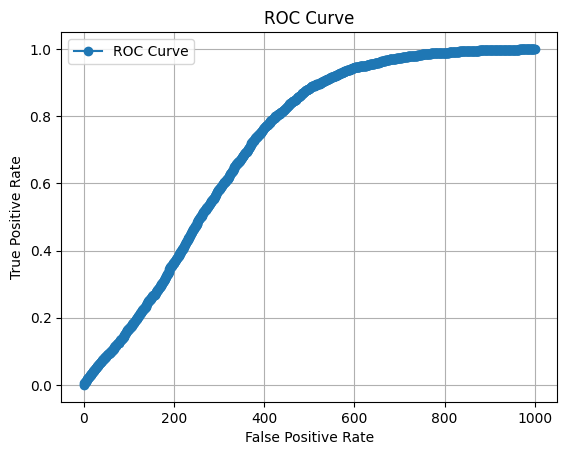

In [11]:
# 8) Using the test set, calculate and display:
#  · accuracy
#  · confusion matrix
#  · Fβ score
#  · AUC
# Also, obtain an SFrame holding the ROC curve points using tc.evaluation.roc_curve(). You will need to convert the false positive rate into specificity. 
# Use matplotlib to create a labeled ROC curve.

test_pred_2 = model2.predict(test_data, output_type='probability')
test_class_2 = model2.predict(test_data, output_type='class')

print('Test Dataset: \n')
print('Confusion Matrix: \n', tc.evaluation.confusion_matrix(test_data['sentiment'], test_class_2))
print('Accuracy:', tc.evaluation.accuracy(test_data['sentiment'], test_class_2))
print('Precision:', tc.evaluation.precision(test_data['sentiment'], test_class_2))
print('Recall:', tc.evaluation.recall(test_data['sentiment'], test_class_2))
print('F[1] Score:', tc.evaluation.fbeta_score(test_data['sentiment'], test_class_2, beta=1))
print('AUC:', tc.evaluation.auc(test_data['sentiment'], test_pred_2))

#ROC curve points:
roc_points = tc.evaluation.roc_curve(test_data['sentiment'], test_pred_2)
roc_points['specificity'] = 1 - roc_points['fpr']
print('\n\nROC curve points with specificity:\n', roc_points)

plt.plot(roc_points['specificity'], marker = 'o', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()